In [70]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [22]:
conn = sqlite3.connect('chinook.sqlite')
cur = conn.cursor()
cur.execute('SELECT name FROM sqlite_master WHERE type="table";')
print(cur.fetchall())
conn.close()

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


In [23]:
conn = sqlite3.connect('chinook.sqlite')
cur = conn.cursor()
cur.execute('SELECT * FROM Artist LIMIT 10;')
print(cur.fetchall())
conn.close()

[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham')]


In [26]:
conn = sqlite3.connect('chinook.sqlite')
df = pd.read_sql_query("SELECT * FROM Album LIMIT 200;", conn)
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [29]:
df['TitleWords'] = df['Title'].str.split(' ')
df.head()

,AlbumId,Title,ArtistId,TitleWords
0,1,For Those About To Rock We Salute You,1,"[For, Those, About, To, Rock, We, Salute, You]"
1,2,Balls to the Wall,2,"[Balls, to, the, Wall]"
2,3,Restless and Wild,2,"[Restless, and, Wild]"
3,4,Let There Be Rock,1,"[Let, There, Be, Rock]"
4,5,Big Ones,3,"[Big, Ones]"


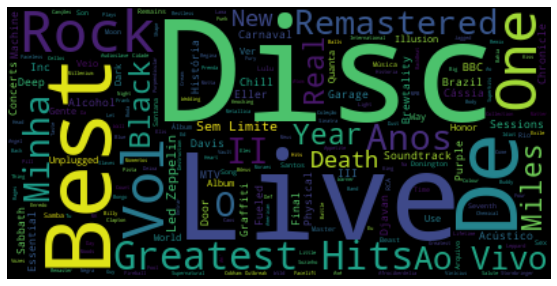

In [73]:
words = df['TitleWords'].sum()
unique_string = (' ').join(words)
# mask = np.array(Image.open('compact_disc.png'))
wordcloud = WordCloud(mask=None).generate(unique_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()
